<a href="https://colab.research.google.com/github/TaherLilywala/NNFL-Projects/blob/main/Human%20Activity%20Recognition/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initial

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
#from hyperopt import Trials, STATUS_OK, tpe
#from hyperas import optim
#from hyperas.distributions import choice, uniform

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import keras

from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os

In [ ]:
data = pd.read_csv('/kaggle/input/human-activity-recognition-with-rnn/train.csv')
#check data shape

In [ ]:
data.shape

(7352, 564)

In [ ]:
data.head(10)

,id,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5
5,5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5
6,6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,5
7,7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,5
8,8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,5
9,9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,5


In [ ]:
data_train, data_val = train_test_split(data, train_size=0.8, test_size=0.2)

train_X = data_train.drop(['id', 'subject', 'activity'], axis=1)
train_Y = data_train.activity

val_X = data_val.drop(['id', 'subject', 'activity'], axis=1)
val_Y = data_val.activity

In [ ]:
activity = data_train.activity.map({1:0, 2:1, 3:2, 4:3, 5:4, 6:5})
data_train["activity"] = activity
train_Y = to_categorical(data_train['activity'], num_classes=6)

activity = data_val.activity.map({1:0, 2:1, 3:2, 4:3, 5:4, 6:5})
data_val["activity"] = activity
val_Y = to_categorical(data_val['activity'], num_classes=6)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_X.shape

(5881, 561)

In [ ]:
train_X = train_X.values.reshape(-1, 1, 561)
val_X  = val_X.values.reshape(-1, 1, 561)
train_Y = train_Y.reshape(-1, 1, 6)
val_Y = val_Y.reshape(-1, 1, 6)

##Model

In [ ]:
model = Sequential()

#model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 561))) # Add in n steps and features
#model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 561)))
#model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 561)))

model.add(tf.keras.layers.Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(1, 561)))
model.add(tf.keras.layers.Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(1, 561)))

model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(125, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(6, activation='softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.025, rho=0.5, momentum=0.01, epsilon=1e-07, centered=False, name="RMSprop")

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_13 (Bidirectio (None, 1, 200)            529600    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 1, 200)            240800    
_________________________________________________________________
dropout_22 (Dropout)         (None, 1, 200)            0         
_________________________________________________________________
dense_63 (Dense)             (None, 1, 500)            100500    
_________________________________________________________________
dense_64 (Dense)             (None, 1, 250)            125250    
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 250)            0         
_________________________________________________________________
dense_65 (Dense)             (None, 1, 125)          

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.99, patience=10, min_lr=0.2)
history = model.fit(train_X, train_Y, batch_size=None, epochs=30, verbose=1, validation_data=(val_X,val_Y), callbacks=[reduce_lr])

Epoch 1/30
184/184 [==============================] - 8s 18ms/step - loss: 1.1369 - accuracy: 0.4498 - val_loss: 0.4241 - val_accuracy: 0.7995
Epoch 2/30
184/184 [==============================] - 3s 14ms/step - loss: 0.2830 - accuracy: 0.8842 - val_loss: 0.1747 - val_accuracy: 0.9205
Epoch 3/30
184/184 [==============================] - 3s 14ms/step - loss: 0.2156 - accuracy: 0.9177 - val_loss: 0.0927 - val_accuracy: 0.9694
Epoch 4/30
184/184 [==============================] - 2s 13ms/step - loss: 0.1403 - accuracy: 0.9479 - val_loss: 0.0827 - val_accuracy: 0.9742
Epoch 5/30
184/184 [==============================] - 2s 13ms/step - loss: 0.1009 - accuracy: 0.9601 - val_loss: 0.1869 - val_accuracy: 0.9191
Epoch 6/30
184/184 [==============================] - 3s 14ms/step - loss: 0.1076 - accuracy: 0.9579 - val_loss: 0.0968 - val_accuracy: 0.9667
Epoch 7/30
184/184 [==============================] - 2s 13ms/step - loss: 0.0983 - accuracy: 0.9639 - val_loss: 0.0778 - val_accuracy: 0.9755

###Plots

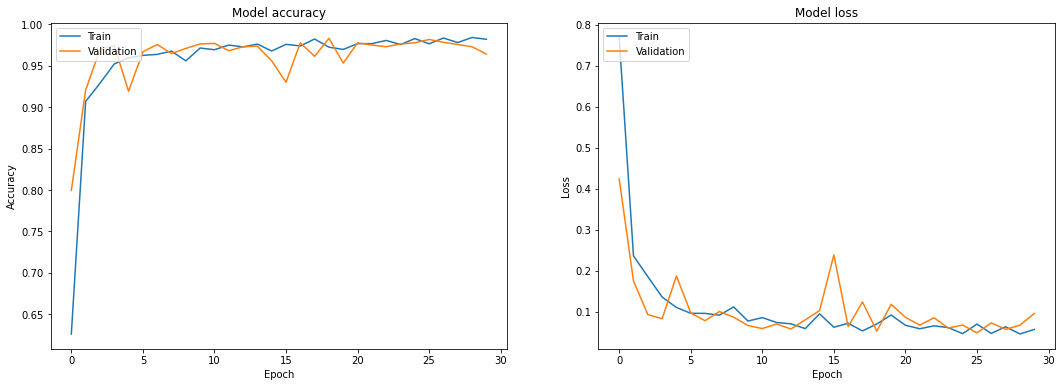

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Submission

In [ ]:
model.save_weights("trial_model.h5")

In [ ]:
test_data = pd.read_csv('/kaggle/input/human-activity-recognition-with-rnn/test.csv')

In [ ]:
print(test_data)

        id  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        0           0.257178          -0.023285          -0.014654   
1        1           0.286027          -0.013163          -0.119083   
2        2           0.275485          -0.026050          -0.118152   
3        3           0.270298          -0.032614          -0.117520   
4        4           0.274833          -0.027848          -0.129527   
...    ...                ...                ...                ...   
2942  2942           0.310155          -0.053391          -0.099109   
2943  2943           0.363385          -0.039214          -0.105915   
2944  2944           0.349966           0.030077          -0.115788   
2945  2945           0.237594           0.018467          -0.096499   
2946  2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         

In [ ]:
#predict = np.zeros((1,6), dtype=int)
#predict = predict.reshape(-1, 1, 6)
test_data = test_data.drop(['id', 'subject'], axis=1)
test_data = test_data.values.reshape(-1,1,561)
predict = model.predict(test_data)

In [ ]:
print(predict)

[[[1.89963791e-11 3.67926696e-12 8.79474902e-15 2.79846572e-04
   9.99720156e-01 3.39943460e-14]]

 [[2.08079247e-04 3.00524960e-04 3.47265377e-05 6.75843775e-01
   3.22769523e-01 8.43394315e-04]]

 [[1.64519934e-05 1.26696405e-05 6.60958506e-07 9.58011597e-02
   9.04164612e-01 4.43803037e-06]]

 ...

 [[5.96489626e-05 9.96472657e-01 3.44020477e-03 2.76424771e-07
   2.71506960e-05 8.02428275e-08]]

 [[7.38295680e-03 9.27169323e-01 5.80818355e-02 6.18578924e-04
   6.55032555e-03 1.96898909e-04]]

 [[8.93293247e-02 6.82647169e-01 1.46048293e-01 1.49264177e-02
   6.15930334e-02 5.45573980e-03]]]


In [ ]:
predict.shape

(2947, 1, 6)

In [ ]:
for i in range(2947):
  max=0
  for j in range(1):
    for k in range(6):
      if predict[i][j][k]>max:
        max=predict[i][j][k]
    for k in range(6):
      if predict[i][j][k]==max:
        predict[i][j][k]=1
      else:
        predict[i][j][k]=0

In [ ]:
results = np.zeros((2947,1), dtype=int)
for i in range(2947):
  max=0
  for j in range(1):
    for k in range(6):
      if predict[i][j][k]==1:
        results[i][0]=k+1
print(results)

[[5]
 [4]
 [5]
 ...
 [2]
 [2]
 [2]]


In [ ]:
dat = pd.read_csv('/kaggle/input/human-activity-recognition-with-rnn/test.csv')
submission = pd.DataFrame(dat, columns = ['id'])
res = pd.DataFrame(results)
submission['activity'] = res

In [ ]:
print(submission)

        id  activity
0        0         5
1        1         4
2        2         5
3        3         5
4        4         5
...    ...       ...
2942  2942         2
2943  2943         2
2944  2944         2
2945  2945         2
2946  2946         2

[2947 rows x 2 columns]


In [ ]:
submission.to_csv('./submission.csv', index=False)